#  Holistic AI - Data Science assessment


In Machine Learning, we say that an algorithm is biased if it is systematically disadvantageous to a group of people. For example, we could say that a recruitment algorithm was biased if it presented a higher success rate for male candidates rather than female candidates. 



In this assessment, we will ask you to build a model for recruitment, which predicts whether a candidate can be hired or not. We will provide you with a dataset composed of N samples (rows) and 503 variables (columns). The columns are: 
* a binary target variable ('Label'), which indicates whether the candidate was hired or not
* 500 different features, which will be used to fit a predictive model of your choice
* the Ethnicity and Gender of the candidates, which we will use to estimate bias in the dataset and in the algorithm. 



We will ask you to: 
1. Explore and pre-process the data
2. Calculate the success rate in the dataset
3. Fit a machine learning model to the data and calculate its generalization performance
4. Calculate a simple measure of model bias. 

## **1 - Data exploration and pre-processing**

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !pip3 install pickle5
import pickle as pickle


Please download the data from the following link: https://hai-data.s3.eu-west-2.amazonaws.com/roadmaps/data.pickle. If running in Colab, please upload the data to the local folder. Otherwise, place the data in the same folder as the notebook. Load the data into a dataframe using pickle and then transform it into a pandas dataframe. 

In [3]:
## TO DO: Load the data
## /TO DO
data = pd.read_pickle('data.pickle')
data.head()

,Label,Gender,Ethnicity,0,1,2,3,4,5,6,...,490,491,492,493,494,495,496,497,498,499
0,0,Female,White,28.021737,4.351153,2.453895,1.637143,-1.746628,-0.483463,0.034170,...,-0.557444,-0.015627,-0.052749,-0.234189,-0.072384,0.090403,0.376761,0.258914,-0.050558,0.014513
1,0,Female,White,29.603342,-3.407193,0.771800,-2.957411,0.599226,-2.805277,0.329414,...,-0.198440,-0.158843,0.191984,-0.004532,0.229210,-0.173042,-0.072871,0.442939,-0.054423,0.026959
2,1,Female,Hispanic,26.504283,0.642464,2.522944,-2.197094,2.270646,-0.472510,0.532815,...,0.423352,-0.033844,-0.125387,-0.483924,-0.116553,-0.113281,0.015519,0.017111,-0.012309,0.264572
3,0,Female,Hispanic,25.012088,0.895121,-2.092517,3.687830,0.539642,1.988930,1.121646,...,-0.280392,0.046582,0.116709,0.133876,0.072716,0.124083,0.213735,-0.149901,-0.217130,0.004403
4,1,Male,Hispanic,27.358934,-2.332423,0.154999,-2.623793,1.682456,1.262280,-1.685565,...,-0.019350,-0.093371,0.003443,-0.025467,0.155397,-0.067609,-0.084833,0.033429,-0.199198,0.229629


Please feel free to do any type of data exploration and pre-processing here (e.g. have you checked for missing values? Is the dataset balanced?)


In [4]:
## TO DO: Data exploration / Pre-processing 
## /TO DO
# Remove rows with missing values.
print('number of rows before:',len(data))
df = data.dropna()
print('number of rows after:',len(df))
print('number of (removed) rows with NaN:',len(data)-len(df),'\n')

#2 Gain a picture of the gender and ethnicity distributions
gender_dist = df['Gender'].value_counts(normalize=True)

ethnicity_dist = df['Ethnicity'].value_counts(normalize=True)

print(gender_dist,'\n')
print(ethnicity_dist)

#3 check data types
df.dtypes.head()

number of rows before: 31771
number of rows after: 27774
number of (removed) rows with NaN: 3997 

Gender
Female    0.516778
Male      0.483222
Name: proportion, dtype: float64 

Ethnicity
White       0.357601
Hispanic    0.334449
Black       0.171383
Asian       0.136567
Name: proportion, dtype: float64


Label          int64
Gender        object
Ethnicity     object
0            float64
1            float64
dtype: object

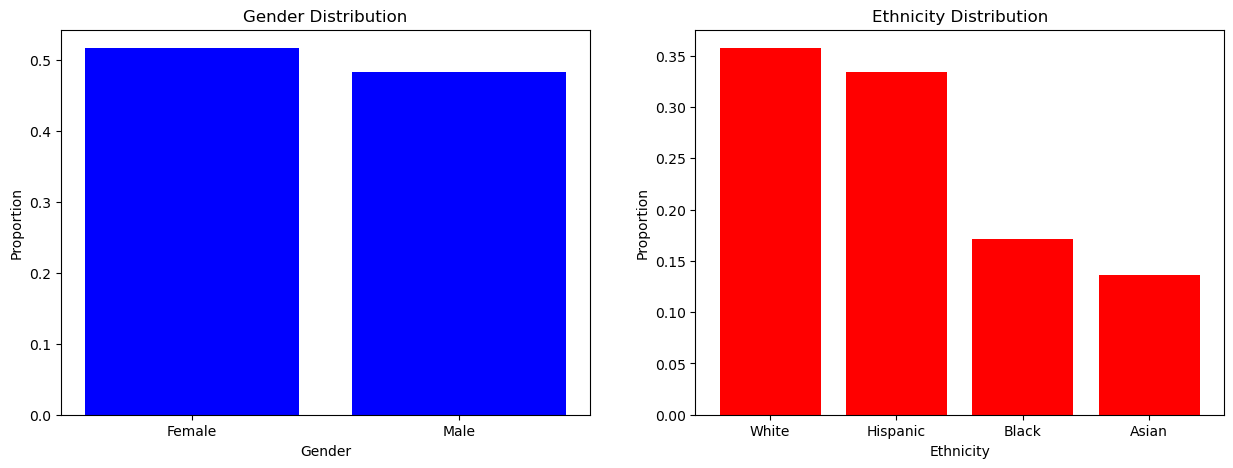

In [5]:
# Create distribution plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot gender distribution
axs[0].bar(gender_dist.index, gender_dist.values, color='blue')
axs[0].set_title('Gender Distribution')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Proportion')

# Plot ethnicity distribution
axs[1].bar(ethnicity_dist.index, ethnicity_dist.values, color='red')
axs[1].set_title('Ethnicity Distribution')
axs[1].set_xlabel('Ethnicity')
axs[1].set_ylabel('Proportion')

plt.show()

Conclusions:
- Graphs show 'Gender' distribution is roughly 50/50.
- Notice that 'Ethnicity' distribution is imbalanced.
- Correct this by using undersampling. We will lose a lot of valuable data but this is a trade-off to hopefully better address imbalance. 

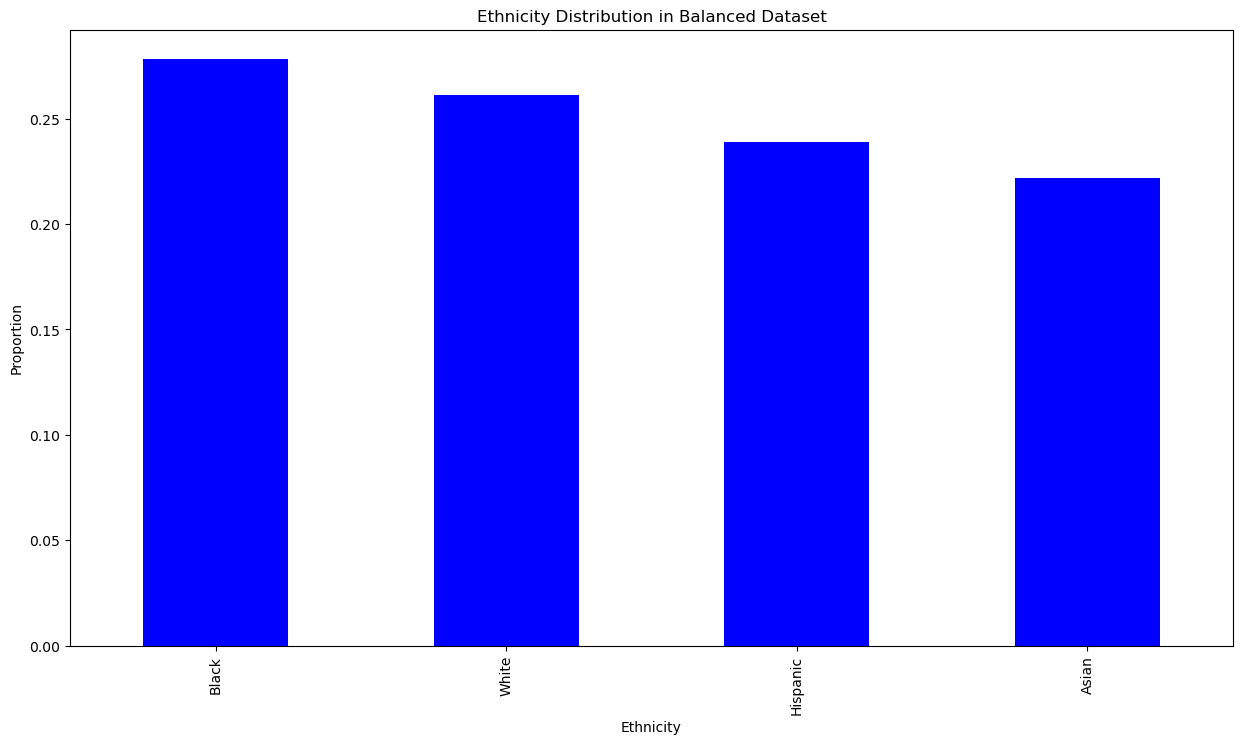

In [6]:
#Create a more balanced df
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Ethnicity'].isin(['White', 'Hispanic'])]
minority_class = df[df['Ethnicity'].isin(['Black', 'Asian'])]

# Downsample majority classes
majority_downsampled = resample(majority_class, replace=False,
n_samples=len(minority_class), random_state=0)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([majority_downsampled, minority_class])

# Shuffle dataset to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Calculate the distribution of ethnicity in balanced_df
ethnicity_distribution = balanced_df['Ethnicity'].value_counts(normalize=True)

# Plot the bar graph
plt.figure(figsize=(15, 8))
ethnicity_distribution.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Ethnicity Distribution in Balanced Dataset')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')

plt.show()

## **2. Bias in the data**



Algorithmic bias can be a result of bias in the data. Please check for bias in the data by calculating and displaying the proportion of successful candidates (success rate) in each group. Do it for both Gender (Female/Male) and Ethnicity (Asian/Black/Hispanic/White). 

For a group $g$:
$$sr_g=\frac{\text{Number of successful outcomes in } g}{\text{Number of individuals in } g}$$




If we use this data for training, can you guess which groups the model will be biased against?


Assumption: 1 = HIRED, 0 = NOT HIRED


In [8]:
## TO DO: Calculate success rates for each group  
## /TO DO
# Make a df for each group
female_df = balanced_df.loc[balanced_df['Gender'] == 'Female']
male_df = balanced_df.loc[balanced_df['Gender'] == 'Male']
asian_df = balanced_df.loc[balanced_df['Ethnicity'] == 'Asian']
black_df = balanced_df.loc[balanced_df['Ethnicity'] == 'Black']
hispanic_df = balanced_df.loc[balanced_df['Ethnicity'] == 'Hispanic']
white_df = balanced_df.loc[balanced_df['Ethnicity'] == 'White']

Scores: 
sr_f = 0.3742443253108247 
sr_m = 0.3675500659551505 
sr_a = 0.33904561033482733 
sr_b = 0.36365546218487393 
sr_h = 0.3736532810969638 
sr_w = 0.4034459610651152


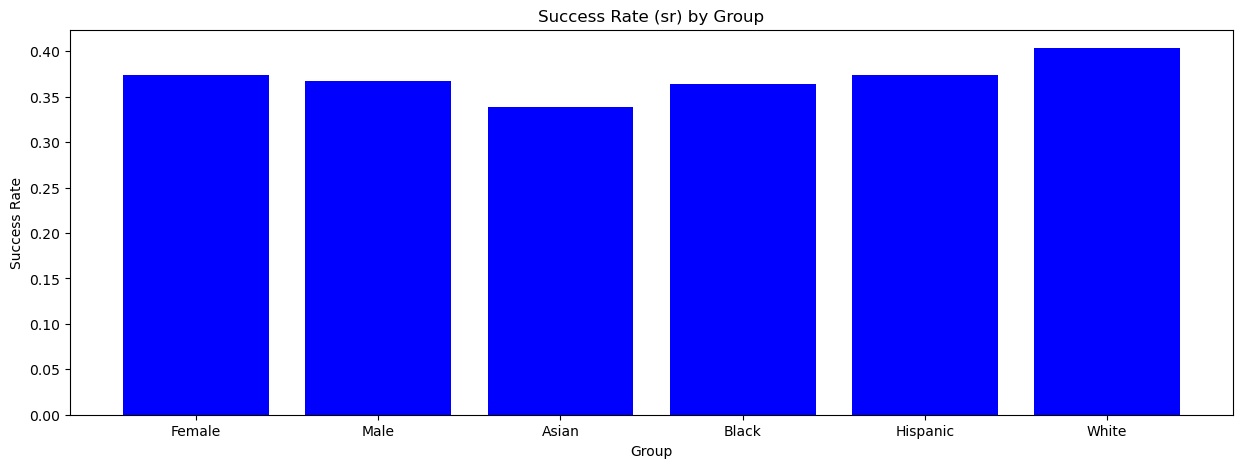

In [9]:
# Calculate the 'sr' scores for each group
sr_female = len(female_df[female_df['Label'] == 1])/len(female_df)
sr_male = len(male_df[male_df['Label'] == 1])/len(male_df)
sr_asian = len(asian_df[asian_df['Label'] == 1])/len(asian_df)
sr_black = len(black_df[black_df['Label'] == 1])/len(black_df)
sr_hispanic = len(hispanic_df[hispanic_df['Label'] == 1])/len(hispanic_df)
sr_white = len(white_df[white_df['Label'] == 1])/len(white_df)
print('Scores:','\n'
      'sr_f =',sr_female,'\n' 
      'sr_m =',sr_male,'\n'
      'sr_a =',sr_asian,'\n' 
      'sr_b =',sr_black,'\n' 
      'sr_h =',sr_hispanic,'\n' 
      'sr_w =',sr_white)
# Define groups and their corresponding 'sr' scores
groups = ['Female', 'Male', 'Asian', 'Black', 'Hispanic', 'White']
sr_scores = [sr_female, sr_male, sr_asian, sr_black, sr_hispanic, sr_white]

# Create a bar graph
plt.figure(figsize=(15, 5))
plt.bar(groups, sr_scores, color='blue')

plt.title('Success Rate (sr) by Group')
plt.xlabel('Group')
plt.ylabel('Success Rate')

plt.show()


## **3. Model fitting**

Fit a model of your choice to the data. Please note: 
1. We do not want to hire people based on gender and ethnicity, so do **not** include these features when training the model. 
2.  You should calculate and print the performance of the model in terms of accuracy, precision and recall. 
3. Make sure to evaluate the **generalization** performance of the model.
4. Do not worry too much about the performance of the model (for reference, an accuracy of 0.7 is a good value)

In [10]:
## TO DO: Fit the model and display performance 
## /TO DO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [11]:
# Remove'Ethnicity' and 'Gender' columns from features
X = balanced_df.drop(['Label'], axis=1)
X = X.drop(['Ethnicity', 'Gender'], axis=1)
y = balanced_df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit multiple logistic regression model - max_iter set to 1000 to avoid convergence warnings
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7138180967968202
Precision: 0.6365007541478129
Recall: 0.532156368221942


Conclusions:
- The model performs reasonably well when correctly identifying successful candidates (success rate greater than 0.7).
- Precision measures the proportion of true positive predictions out of all positive predictions made by the model (i.e. indicates how often the model makes accurate positive predictions and minimises false positives).
- Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset (i.e. indicates how often the model accurately captures all positive instances and minimises false negatives).
- With the Precision and Recall measures, we can further evaluate the accuracy of the model, but only if we establish a satisfactory threshold value.

## **4. Bias in the model** 

In order to check if the model is biased we need to compare the success rate in the unprivileged group with the success rate with the privileged group (e.g. Female/Male, Black/White, Asian/White, ...). 

For a group $g$:
$$sr_g=\frac{\text{Number of successful outcomes in } g}{\text{Number of individuals in } g}$$





We can compare these success rates by taking the ratio (Disparate Impact) or subtracting them (Statistical Parity). If we call the unprivileged group $u$, and the privileged group $p$, we have:

$Disparate\ impact=\frac{sr_u}{sr_p}$, with reference value 1. 

$Statistical\ parity=sr_u - sr_p$, with reference value 0.



Take any unpriviledged group and compare it to a priviledged one. Calculate and print the Disparate Impact and Statistical Parity metrics. Is the model biased? Please make sure to evaluate how the model performs on unseen data.

In [9]:
## TO DO: Calculate and display dispareate impact and statistical parity for a group of your choice
## /TO DO

Let's compare groups with highest and lowest success rates: ethnically **White** and ethnically **Asian** candidates.

In [16]:
# Start by creating a df with predicted labels, true labels, and ethnicities

# Create a df with predicted labels and true labels
results_balanced_df = pd.DataFrame({'Predicted': y_pred, 'True': y_test})

# Retrieve ethnicity information from the original df using the indices of the test set
ethnicity_test = data.loc[X_test.index, 'Ethnicity']

# Add ethnicity information to results_df
results_balanced_df['Ethnicity'] = ethnicity_test
results_balanced_df.head()

,Predicted,True,Ethnicity
5552,0,0,Asian
7577,0,0,NaN
9304,0,0,White
2095,1,0,White
548,0,0,White


In [17]:
# Create a function to calculate metrics for each ethnic group
def group_metrics(group_name):
    # Filter results_df based on the ethnic group
    group_results = results_balanced_df[results_balanced_df['Ethnicity'] == group_name]
    
    # Extract predicted and true labels for the group
    y_pred_group = group_results['Predicted']
    y_true_group = group_results['True']
    
    accuracy_group = accuracy_score(y_true_group, y_pred_group)
    precision_group = precision_score(y_true_group, y_pred_group)
    recall_group = recall_score(y_true_group, y_pred_group)
    
    return accuracy_group, precision_group, recall_group

# Calculate metrics for Asian group
accuracy_asian, precision_asian, recall_asian = group_metrics('Asian')
# Calculate metrics for White group
accuracy_white, precision_white, recall_white = group_metrics('White')

print("Asian Group:")
print("Accuracy:", accuracy_asian)
print("Precision:", precision_asian)
print("Recall:", recall_asian,'\n')

print("White Group:")
print("Accuracy:", accuracy_white)
print("Precision:", precision_white)
print("Recall:", recall_white,'\n')

disp_impact = accuracy_asian/accuracy_white
stat_parity = accuracy_asian-accuracy_white

print('Disparate Impact =',disp_impact,'\n'
      'Statistical Parity =',stat_parity)

Asian Group:
Accuracy: 0.714
Precision: 0.6535947712418301
Recall: 0.5263157894736842 

White Group:
Accuracy: 0.7194940476190477
Precision: 0.6466346153846154
Recall: 0.5390781563126252 

Disparate Impact = 0.9923640124095139 
Statistical Parity = -0.005494047619047704


Conclusions:

- From the disparate impact score being close to 1, we can infer that the model performs similarly in terms of accurately predicting whether Asian and White candidates were successful in their applications.
- The statistical parity score being close to 0 implies similar conclusions.
- The precision and recall scores are also relatively close.


- I also performed the same analysis on the original (unbalanced) dataframe - which I haven't inlcuded in this notebook for time/resource constraints. The model returned a higher recall metric for the White group compared with the Asian group.
- This implies that the model trained on unbalanced data may be better at identifying candidates from the White group who should be hired compared to the Asian group.
- This could indicate a potential bias in the model's performance between the two groups, and validates the decision to undersample the data originally. 


- With these results, we can tentatively infer that the model is not notably biased when comparing Asian and White candidates.
- But, in order to ensure fairness and minimise any potential biases, further investigation must be done.
- This includes comparing 'Gender' groups and other 'Ethnicity' groups and potentially performing an intersectional analysis that includes both 'Gender' and 'Ethnicity'. 
